In [91]:
import sys
print("Python Version:", sys.version)

Python Version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [92]:
import numpy as np 
print("Numpy Version:", np.__version__)

Numpy Version: 1.18.1


In [93]:
import pandas as pd
print("Pandas Version: ",pd.__version__) 

Pandas Version:  1.0.3


In [94]:
import sklearn
print("Sklearn Version: {a}".format(a=sklearn.__version__))

Sklearn Version: 0.22.1


In [95]:
import matplotlib 
print("Matplotlib Version: {a}".format(a=matplotlib.__version__))

Matplotlib Version: 3.1.3


In [96]:
import scipy as sc 
print(f"Scipy Version : {sc.__version__}")

Scipy Version : 1.4.1


In [97]:
import matplotlib.pyplot as plt  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix   
from pandas.plotting import scatter_matrix

### Loading the dataset using pandas(iris-flower)

In [128]:
iris_dataset = pd.read_csv('iris_flower.csv')
iris_dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
iris_dataset.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [100]:
print(f"Shape of data : {iris_dataset.shape}")

Shape of data : (150, 5)


In [101]:
print(f"Missing Values : \n{iris_dataset.isna().sum()}")

Missing Values : 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [102]:
iris_dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [103]:
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualisation

histogram

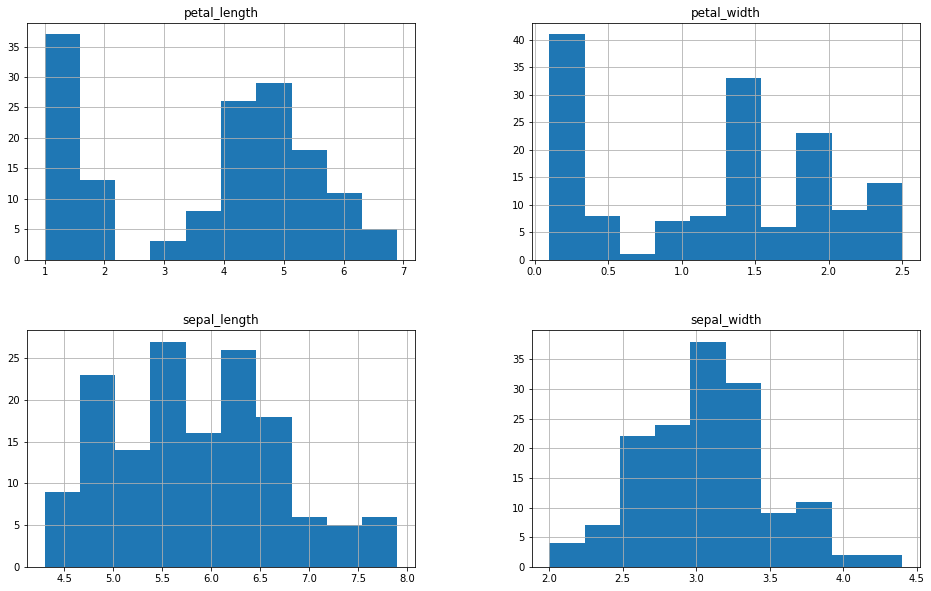

In [104]:
iris_dataset.hist(figsize=(16,10))
plt.show()

density plot

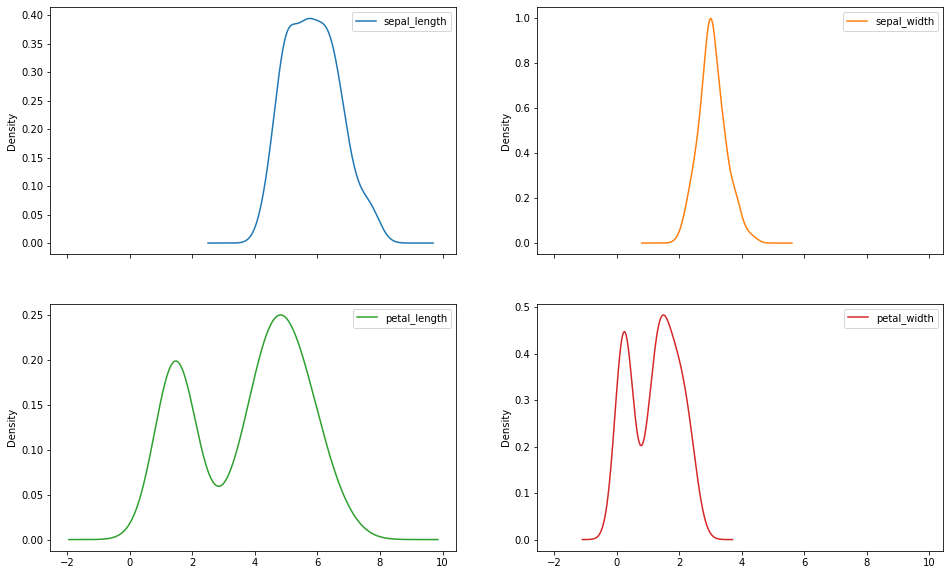

In [105]:
iris_dataset.plot(kind='density', subplots=True, layout=(2,2), sharex=True, figsize=(16,10))
plt.show()

Box Whisker plot

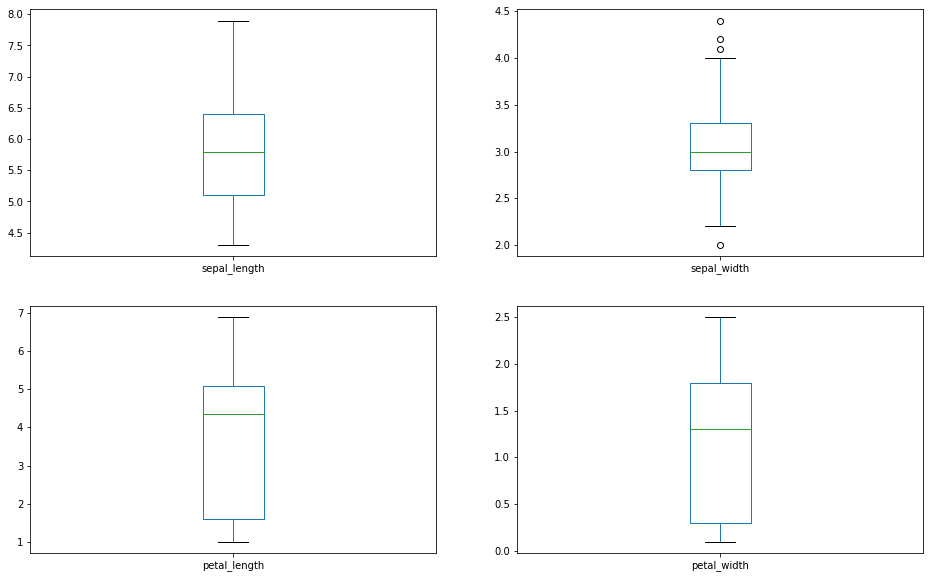

In [129]:
iris_dataset.plot(kind='box', subplots=True, layout=(2,2) , sharex=True, figsize=(16,10))
plt.show()

In [107]:
des = iris_dataset.describe()
des

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [108]:
q3 =  des.at['75%','sepal_width']

In [109]:
q1 = des.at['25%', 'sepal_width']

In [110]:
iqr = q3 - q1

In [111]:
q4 = q3 + 1.5*iqr
q4

4.05

In [112]:
q5 = q1 - 1.5*iqr
q5

2.05

In [135]:
# removing the outliers
for i in range(len(iris_dataset['sepal_width'])):
    if(iris_dataset['sepal_width'][i] > 4.05 or iris_dataset['sepal_width'][i]  < 2.05):
        iris_dataset['sepal_width'][i] = iris_dataset['sepal_width'].mean()

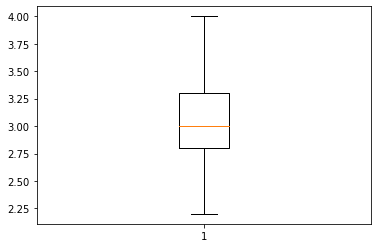

In [136]:
plt.boxplot(iris_dataset.sepal_width)
plt.show()

In [114]:
correlation = iris_dataset.corr()
correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


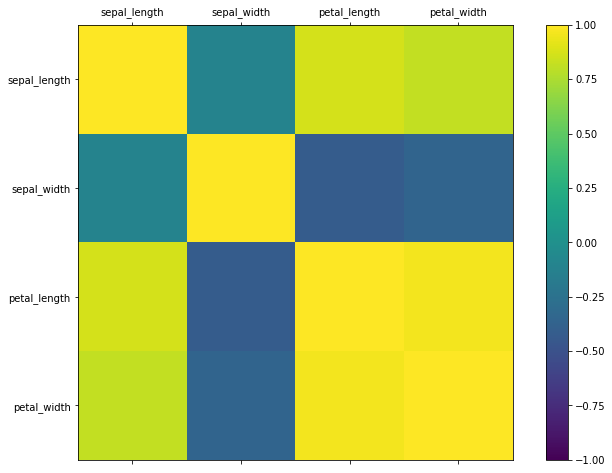

In [115]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cx = ax.matshow(correlation, vmax=1, vmin=-1)
fig.colorbar(cx)
ticks = np.arange(len(correlation))
labels = correlation.columns
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

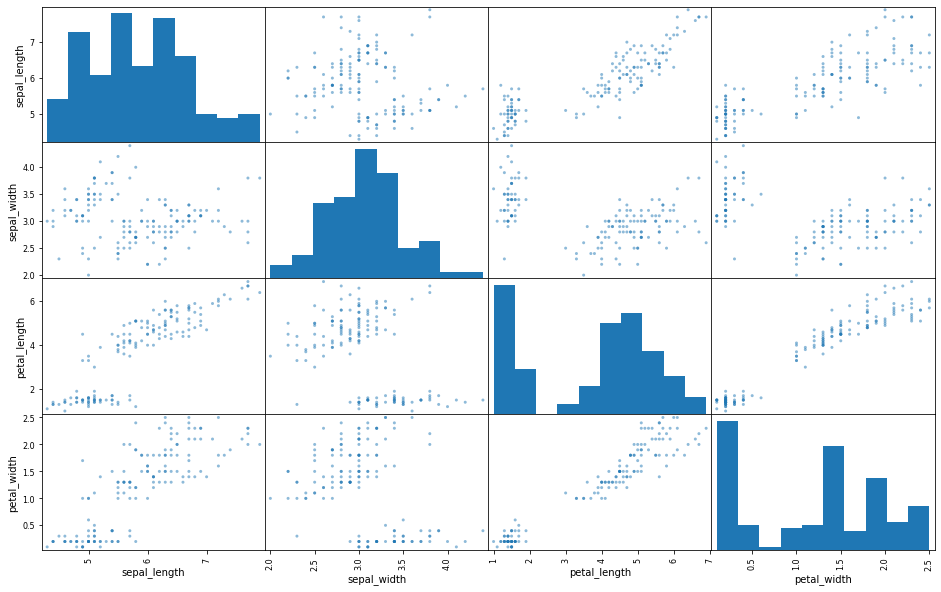

In [116]:
scatter_matrix(iris_dataset, figsize=(16,10))
plt.show()

In [117]:
X = iris_dataset.iloc[:,:-1].values
Y = iris_dataset.iloc[:,-1].values

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.3, random_state=7)

In [119]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [120]:
Y_pred = model.predict(X_test)

In [121]:
print(f"Accuracy : {accuracy_score(Y_pred, Y_test)}")

Accuracy : 0.9111111111111111


In [122]:
confusion_matrix(Y_test, Y_pred)

array([[12,  0,  0],
       [ 0, 15,  1],
       [ 0,  3, 14]], dtype=int64)

In [123]:
print(classification_report(Y_test, Y_pred))

precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.93      0.82      0.87        17

       accuracy                           0.91        45
      macro avg       0.92      0.92      0.92        45
   weighted avg       0.92      0.91      0.91        45



In [124]:
X_input  = [[4.9, 3.1, 1.5, 0.1]]
print("Prediction: ", model.predict(X_input))

Prediction:  ['Iris-setosa']


In [125]:
df = pd.DataFrame({'sepal_length': 	X_test[:,0],
'sepal_width': X_test[:,1],
'petal_length':	X_test[:,2],
'petal_width': X_test[:,3] ,
'Actual': Y_test,
'Predicted ': Y_pred})

In [126]:
df

,sepal_length,sepal_width,petal_length,petal_width,Actual,Predicted
0,5.9,3.0,5.1,1.8,Iris-virginica,Iris-virginica
1,5.4,3.0,4.5,1.5,Iris-versicolor,Iris-versicolor
2,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
3,5.6,3.0,4.5,1.5,Iris-versicolor,Iris-versicolor
4,4.9,2.5,4.5,1.7,Iris-virginica,Iris-versicolor
5,4.5,2.3,1.3,0.3,Iris-setosa,Iris-setosa
6,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor
7,5.6,2.7,4.2,1.3,Iris-versicolor,Iris-versicolor
8,4.8,3.4,1.6,0.2,Iris-setosa,Iris-setosa
9,6.4,3.2,4.5,1.5,Iris-versicolor,Iris-versicolor
